In [1]:
import yfinance as yf
import pandas as pd
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [27]:
sp500.index = pd.to_datetime(sp500.index)
sp500 = sp500.dropna()


In [28]:
sp500.index

DatetimeIndex(['1990-01-02 00:00:00-05:00', '1990-01-03 00:00:00-05:00',
               '1990-01-04 00:00:00-05:00', '1990-01-05 00:00:00-05:00',
               '1990-01-08 00:00:00-05:00', '1990-01-09 00:00:00-05:00',
               '1990-01-10 00:00:00-05:00', '1990-01-11 00:00:00-05:00',
               '1990-01-12 00:00:00-05:00', '1990-01-15 00:00:00-05:00',
               ...
               '2024-04-30 00:00:00-04:00', '2024-05-01 00:00:00-04:00',
               '2024-05-02 00:00:00-04:00', '2024-05-03 00:00:00-04:00',
               '2024-05-06 00:00:00-04:00', '2024-05-07 00:00:00-04:00',
               '2024-05-08 00:00:00-04:00', '2024-05-09 00:00:00-04:00',
               '2024-05-10 00:00:00-04:00', '2024-05-13 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=8657, freq=None)

<Axes: xlabel='Date'>

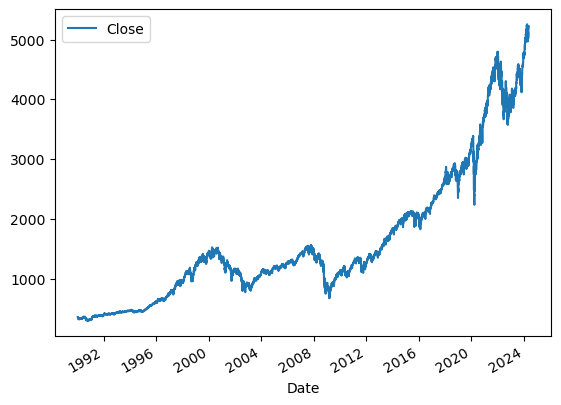

In [29]:
#clean and visualize data
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [30]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [31]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [32]:
sp500 = sp500.loc["1990-01-01":].copy()

In [33]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [34]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
#split data
train = sp500.iloc[:-200]
test = sp500.iloc[-200:-100]
predictors = ["Open", "High", "Low", "Close", "Volume"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [35]:
preds = model.predict(test[predictors])
preds

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [36]:
preds = pd.Series(preds, index=test.index)
preds

Date
2023-07-28 00:00:00-04:00    1
2023-07-31 00:00:00-04:00    1
2023-08-01 00:00:00-04:00    0
2023-08-02 00:00:00-04:00    1
2023-08-03 00:00:00-04:00    1
                            ..
2023-12-12 00:00:00-05:00    1
2023-12-13 00:00:00-05:00    0
2023-12-14 00:00:00-05:00    0
2023-12-15 00:00:00-05:00    0
2023-12-18 00:00:00-05:00    0
Length: 100, dtype: int32

In [25]:
precision_score(test["Target"], preds)

0.5

<Axes: xlabel='Date'>

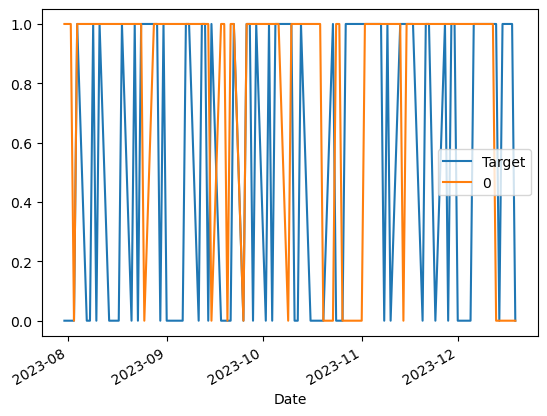

In [16]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [17]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [18]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500[:5000], model, predictors)

In [46]:
predictions["Predictions"].value_counts()

Predictions
0    238
1     13
Name: count, dtype: int64